In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates

plt.rcParams["figure.figsize"] = [10, 6]
# %matplotlib inline

## Reading In Data and Performing Data Cleaning and Organization

In [10]:
proteomics_ack = pd.read_excel("data/AcK_FINAL.xlsx", sheet_name="Fold Change by Protein Type", skiprows=10)

proteomics_total = pd.read_excel("data/TotalProteome_FINAL.xlsx", sheet_name="Fold Change - Protein", skiprows=10)
proteomics_total

,Index,Gene Name,Protein Name,Sample 2 : Sample 1,Sample 3 : Sample 1,Sample 3 : Sample 2,Sample 2 : Sample 1.1,Sample 3 : Sample 1.1,Sample 3 : Sample 2.1,Accession,...,Sample 3 : Sample 2.3,Sample 2 : Sample 1.4,Sample 3 : Sample 1.4,Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Sample 2 : Sample 1.6,Sample 3 : Sample 1.6,Sample 3 : Sample 2.6
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,–,–,–,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,–,–,–
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05


### Examining overall shape and information of the data

In [11]:
print("proteomics_ack shape is ", proteomics_ack.shape)
print()

print(proteomics_ack.head())
print()

print(proteomics_ack.describe())

print("proteomics_total shape is ", proteomics_total.shape)
print()

print(proteomics_total.head())
print()

print(proteomics_total.describe())

proteomics_ack shape is  (887, 101)

   Index   Index in Detail  Sample 2 : Sample 1 Sample 3 : Sample 1  \
0      1  Adaptor/scaffold                  NaN                 NaN   
1      2                35            23.655555             1.10431   
2      3                36             3.631596             -2.0099   
3      4                37             3.144754             2.99733   
4      5                48             8.843813             1.87013   

   Sample 3 : Sample 2  Max Abundance  Max % CV Gene Name  Protein Name  \
0                  NaN            NaN       NaN       NaN           NaN   
1           -23.409127   2.456167e+07  0.643131       Fgb           FGB   
2            -7.976540   1.991868e+07  0.324883       Fgb           FGB   
3            -1.146557   2.710754e+06  0.622032   Lpp;Lpp  LPP;LPP iso4   
4            -5.167873   5.383860e+06  0.675029     Rai14         RAI14   

      Site  ... Run 1 Sample 2 : Sample 1.4 Run 1 Sample 3 : Sample 1.4  \
0      NaN

In [12]:
print(proteomics_total.columns)
print()
print(proteomics_ack.columns)

Index(['Index', 'Gene Name', 'Protein Name', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Sample 2 : Sample 1.1',
       'Sample 3 : Sample 1.1', 'Sample 3 : Sample 2.1', 'Accession',
       'Description', 'Protein Type', 'Peptide Count', 'Sample 1 (126)',
       'Sample 2 (127b)', 'Sample 3 (130b)', 'Sample 1 (126).1',
       'Sample 2 (127b).1', 'Sample 3 (130b).1', 'Sample 2 : Sample 1.2',
       'Sample 3 : Sample 1.2', 'Sample 3 : Sample 2.2',
       'Sample 2 : Sample 1.3', 'Sample 3 : Sample 1.3',
       'Sample 3 : Sample 2.3', 'Sample 2 : Sample 1.4',
       'Sample 3 : Sample 1.4', 'Sample 3 : Sample 2.4',
       'Sample 2 : Sample 1.5', 'Sample 3 : Sample 1.5',
       'Sample 3 : Sample 2.5', 'Sample 2 : Sample 1.6',
       'Sample 3 : Sample 1.6', 'Sample 3 : Sample 2.6'],
      dtype='object')

Index(['Index', 'Index in Detail', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Max Abundance',
       'Max % CV', 'G

### Renaming the columns for both sets of data to make it easier to work with.

In [13]:
# Ack Proteome Data Set
# Renaming the fold change columns
proteomics_ack.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)



# Total Proteome Data Set

# Renaming the fold change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)

# Renaming the p value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.1": "pv_s2vs1", 
                "Sample 3 : Sample 1.1": "pv_s3vs1",
                "Sample 3 : Sample 2.1": "pv_s3vs2"}, inplace=True)

# Renaming the Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126)": "ss_Sample_1_126", 
                "Sample 2 (127b)": "ss_Sample_2_127b",
                "Sample 3 (130b)": "ss_Sample_3_130b"}, inplace=True)

# Renaming the Normalized Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126).1": "nss_Sample_1_126", 
                "Sample 2 (127b).1": "nss_Sample_2_127b",
                "Sample 3 (130b).1": "nss_Sample_3_130b"}, inplace=True)

# Renaming the raw ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.2": "rr_s2vs1", 
                "Sample 3 : Sample 1.2": "rr_s3vs1",
                "Sample 3 : Sample 2.2": "rr_s3vs2"}, inplace=True)

# Renaming the Log2 ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.3": "log2_s2vs1", 
                "Sample 3 : Sample 1.3": "log2_s3vs1",
                "Sample 3 : Sample 2.3": "log2_s3vs2"}, inplace=True)

# Renaming the Normalized Log2 Ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.4": "norm_log2_s2vs1", 
                "Sample 3 : Sample 1.4": "norm_log2_s3vs1",
                "Sample 3 : Sample 2.4": "norm_log2_s3vs2"}, inplace=True)

# Renaming the second Normalized Fold Change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.5": "nfc_s2vs1", 
                "Sample 3 : Sample 1.5": "norm_fc2_s3vs1",
                "Sample 3 : Sample 2.5": "norm_fc2_s3vs2"}, inplace=True)


# Renaming the second p-value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.6": "pv2_s2vs1", 
                "Sample 3 : Sample 1.6": "pv2_s3vs1",
                "Sample 3 : Sample 2.6": "pv2_s3vs2"}, inplace=True)

# proteomics_ack
proteomics_total = proteomics_total.replace(to_replace="–", value=0)
proteomics_total

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


### Replacing the - in the p-value columns with zero for better plotting.

### Data cleaning : Eliminating un-nessesary columns

In [14]:
proteomics_ack = proteomics_ack[proteomics_ack['nfc_s2vs1'].notna()]
proteomics_ack


,Index,Index in Detail,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,2,35,23.655555,1.10431,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,3,36,3.631596,-2.0099,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,4,37,3.144754,2.99733,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,5,48,8.843813,1.87013,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,6,68,3.454298,4.7209,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,5581,4.354904,-1.03223,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,883,5582,14.425522,-3.8181,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,884,5583,130.183213,3.09442,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,885,5585,3.803267,-3.47581,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


## Histogram / Density plot of ack and total proteome data

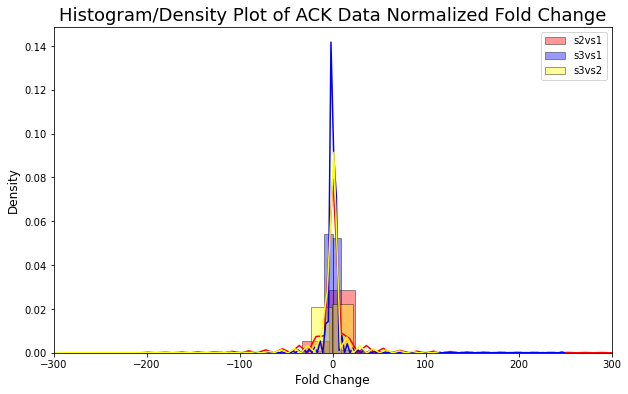

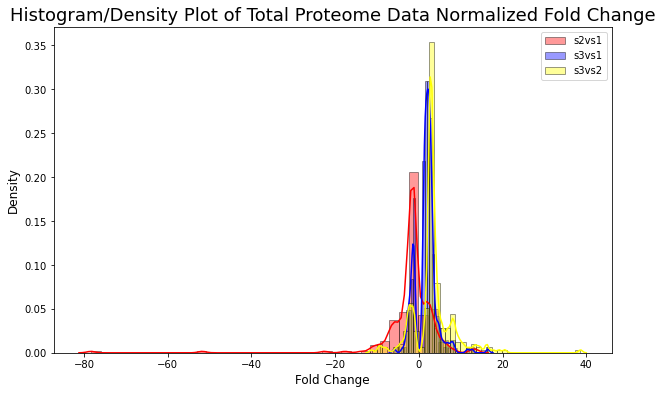

In [15]:
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)

sns.distplot(nfc_plot_data_ack["nfc_s2vs1"], bins=40, label="s2vs1",color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of ACK Data Normalized Fold Change", fontsize= 18)
plt.xlim(-300, 300)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();

nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

sns.distplot(nfc_plot_data_total["nfc_s2vs1"], bins=40, label="s2vs1", color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();


## Parallel Coordinate Plots

In [16]:
col = proteomics_ack.pop("Index")
proteomics_ack.insert(1, col.name, col)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.10431,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.0099,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.99733,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.87013,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.7209,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.03223,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.8181,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.09442,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.47581,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


In [17]:
print("No.of.unique values :" , len(pd.unique(proteomics_total["Protein Name"])))

print("Total number of values :", len(proteomics_total["Protein Name"]))
proteomics_total

No.of.unique values : 254
Total number of values : 254


,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


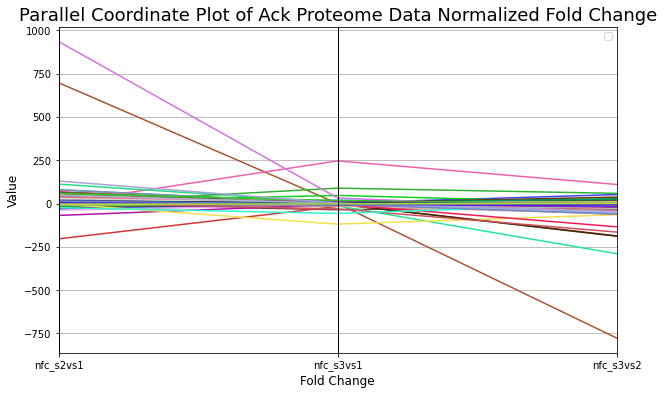

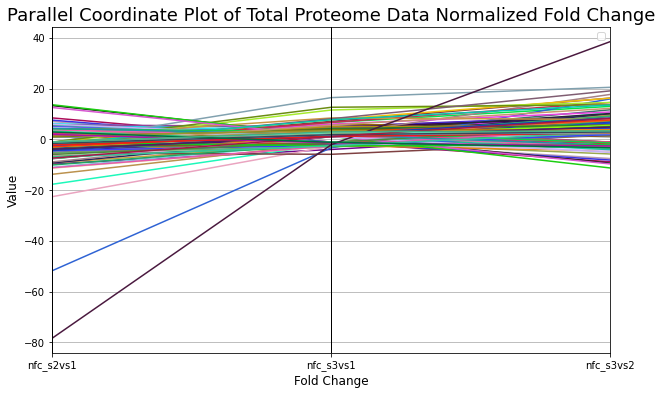

In [18]:
# Ack Proteome Data
nfc_plot_data_ack = proteomics_ack.iloc[:, 1:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)
nfc_plot_data_ack

pd.plotting.parallel_coordinates(nfc_plot_data_ack, "Index")
plt.title("Parallel Coordinate Plot of Ack Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

# Total Proteome Data
nfc_plot_data_total = proteomics_total.iloc[:, 2:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

pd.plotting.parallel_coordinates(nfc_plot_data_total, "Protein Name")
plt.title("Parallel Coordinate Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

## Ordinal Regression/Slope Plots

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

In [21]:

proteomics_ack['nfc_s3vs1'] = pd.to_numeric(proteomics_ack['nfc_s3vs1'],errors = 'coerce')
proteomics_ack.replace(np.nan,0)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,0.000000,0.000000,0.000000,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.818102,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.094416,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.475807,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


### Calculating the difference between the column values

In [39]:
proteomics_ack['diff_s2vs1_s3vs1'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs1'], axis=1)
proteomics_ack['diff_s3vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s3vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack['diff_s2vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse,-1.266603,3.470292,2.203689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse,5.387134,3.880224,9.267357
882,5582,883,14.425522,-3.818102,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse,18.243624,56.371658,74.615282
883,5583,884,130.183213,3.094416,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse,127.088797,49.069212,176.158009
884,5585,885,3.803267,-3.475807,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse,7.279074,10.970471,18.249545


In [40]:
# mod = smf.ols(formula='nfc_s2vs1 + nfc_s3vs1 + nfc_s3vs2', data=proteomics_ack).fit()
# print_model = mod.summary()
# print(print_model)

In [41]:
# Total Proteome Data
nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

print(nfc_plot_data_total.head(3))

# Ack Proteome Data
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)

print(nfc_plot_data_ack.head(3))

   nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
0  -6.743289  -2.169717   3.155556
1  -2.748379  -1.410763   1.978015
2  -9.654748  -3.975903   2.465541
   nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
1  23.655555   1.104311 -23.409127
2   3.631596  -2.009896  -7.976540
3   3.144754   2.997329  -1.146557


### Using Linear and Ordinal Regression to calculate the slope of the rows

In [52]:
# https://stackoverflow.com/questions/69520967/how-to-get-the-slope-of-multiple-columns-in-python-data-frame
from sklearn.linear_model import LinearRegression
import mord

model = LinearRegression()
def get_coeff_linear(row, model=model):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

# https://pythonhosted.org/mord/
m = mord.OrdinalRidge()
def get_coeff_ordinal(row, model=m):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

In [54]:
nfc_plot_data_ack["slope_linear"] = nfc_plot_data_ack.apply(get_coeff_linear, axis=1)
nfc_plot_data_total["slope_linear"] = nfc_plot_data_total.apply(get_coeff_linear, axis=1)

nfc_plot_data_ack["slope_ordinal"] = nfc_plot_data_ack.apply(get_coeff_ordinal, axis=1)
nfc_plot_data_total["slope_ordinal"] = nfc_plot_data_total.apply(get_coeff_ordinal, axis=1)

print("Ack Data : \n\n", nfc_plot_data_ack.head(3))
print("\nTotal Data : \n\n", nfc_plot_data_total.head(3))

Ack Data : 

    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2      slope  slope_linear  slope_ordinal
1  23.655555   1.104311 -23.409127 -13.720142     -4.324334      -3.992808
2   3.631596  -2.009896  -7.976540  -2.436278     -0.289941      -0.252531
3   3.144754   2.997329  -1.146557  -1.941403     -0.960077      -0.897533

Total Data : 

    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2     slope  slope_linear  slope_ordinal
0  -6.743289  -2.169717   3.155556  3.661254      1.545089       1.439059
1  -2.748379  -1.410763   1.978015  1.667668      0.671789       0.624930
2  -9.654748  -3.975903   2.465541  5.066073      2.369741       2.212620
